**AGENT-BASED ARTIFICIAL INTELLIGENCE, POLIBA, A.Y. 2023/2024**

**Game Playing**

List of Contributors:
- Tommaso Di Noia
- Alberto Carlo Maria Mancino
- Vincenzo Paparella

### Introduction to Game Playing

So far, we have studied search algorithms in which a single agent was involved in an environment.

Now, we move toward **competitive environments**, in which two or more agents compete among them. Since we have at least two agents in a competitive environments, this kind of problems are defined as **games**.

We will focus on **deterministic**, **two-player**, **perfect information**, **zero-sum** games. Perfect information is a synonym for "fully observable", and “zero-sum” means that what is good for one player is just as bad for the other: there is no “win-win” outcome.

We will call our two players MAX and MIN. MAX moves first, and then the players take turns moving until the game is over.

### Game implementation

Let's start by defining a game. Defining a game has strong similarities with formulating a search problem.

A game can be formally defined with the following elements:
* the **initial state**, which specifies how the game is set up at the start;
* the **player** whose **turn** it is to move in a state;
* the set of legal moves in a state (corresponding to the **actions**).
* the **transition model**, which defines the state resulting from taking an action in a state.
* a **terminal test**, which is true when the game is over and false otherwise. States where the game has ended are called terminal states.
* a **utility function**, which defines the final numeric value to a given player when the game ends in the terminal state.

Similarly as in search problems, the initial state, the set of moves, and the transition model define the **state space graph**. Consequently, we define the  **game tree** as a search tree that follows every sequence of moves all the way to a terminal state.

Let's build the skeleton of a game. At this point of the Agent-based Artificial Intelligence course, it is easy to understand that it is convenient to implement the game within a "**Game**" class.

Within the constructor of this class, we initialize the initial state and the first player of the game given in input. Then, we implement the following functions corresponding to the points we have seen in the game definition:
* the **actions** function that, given a state, returns the list of possible actions from that state;
* the **result** function corresponding to the transition model. Given a state and an action in input, it returns the reached state;
* the **successors** function that, given a state, returns the reachable states by performing all the possible actions from the state;
* the **terminal_test** function that, given a state, returns True if the state is a final state (the game is over), False otherwise;
* the **player_utility** function that, given a state, returns the utility associated to that state for a player. It exploits the **utility** function.
* the **utility** function that, given a state, returns its utility from the point of view of MAX. Indeed, in the player_utility function, we return the positive value computed by the utility function if the player is MAX, the negative value if the player is MIN. Indeed, we recall that the games we are studying is a zero-sum game.
* the **next_player** function that returns the next player to move (corresponding to the player-turn in the defnition above).

In [ ]:
class Game:
    def __init__(self, initial_state, player):
        self.initial_state = initial_state
        self.player = player

    def actions(self, state):
        """
        Given a state return the list of possible actions
        @param state: a state of the game
        @return: a list
        """
        return []

    def result(self, state, action):
        """
        Given a state and an action returns the reached state
        @param state: a state of the game
        @param action: a possible action in the state
        @return: a new state
        """
        return []

    def successors(self, state):
        """
        Given a state returns the reachable states with the respective actions
        :param state: actual state
        :return: list of successor states and actions
        """
        possible_actions = self.actions(state)
        return [(self.result(state, a), a) for a in possible_actions]

    def terminal_test(self, state):
        """
        Returns True if the state is a final state (the game is over), False otherwise
        @param state: a state of the game
        @return: True or False
        """
        return False

    def utility(self, state):
        """
        Given a state returns its utility
        @param state: a state of the game
        @return: a utility value
        """
        return 0

    def player_utility(self, state):
        """
        Given a state, returns the utility of the state from the view of the MAX or the MIN player
        @param state: a state
        @return: a utility value
        """
        if self.player == 'MAX':
            # for MAX player
            return self.utility(state)
        elif self.player == 'MIN':
            # for MIN player
            return -self.utility(state)
        else:
            raise ValueError

    def next_player(self):
        """
        Return the next player to move
        @return: MAX or MIN
        """
        if self.player == 'MAX':
            return 'MIN'
        else:
            return 'MAX'

### Dummy Game

To test the algorithms we will implement, we use the dummy game represented by the three below.

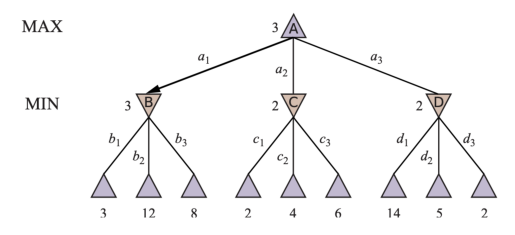

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('sample_data/dummy_game.png')
plt.imshow(img)
plt.axis('off')
plt.show()


The △ nodes are "MAX nodes", in which it is MAX's turn to move, and the ▽ nodes are "MIN nodes". The terminal nodes show the utility values for MAX; the other nodes are labeled with their minimax values. MAX's best move at the root is a1, because it leads to the state with the highest minimax value, and MIN's best reply is b1, because it leads to the state with the lowest minimax value.

Let's hard-code the actions and the utility in a **DummyGame** class that inherits the skeleton of a game.

In [ ]:
# let's populate the skeleton with our dummy game
class DummyGame(Game):
    def __init__(self, initial_state=None, player='MAX'):
        if initial_state is None:
            initial_state = 'A'
        super(DummyGame, self).__init__(initial_state, player)
        self.initial_state = initial_state
        self.player = player

    def actions(self, state):
        """
        Given a state return the list of possible actions
        @param state: a state of the game
        @return: a list
        """
        actions = {
            'A': ['a1', 'a2', 'a3'],
            'B': ['b1', 'b2', 'b3'],
            'C': ['c1', 'c2', 'c3'],
            'D': ['d1', 'd2', 'd3'],
        }
        if state in actions:
            return actions[state]
        else:
            return []

    def result(self, state, action):
        """
        Given a state and an action returns the reached state
        @param state: a state of the game
        @param action: a possible action in the state
        @return: a new state
        """
        result = {
            'A': {
                'a1': 'B',
                'a2': 'C',
                'a3': 'D'},
            'B': {
                'b1': 'B1',
                'b2': 'B2',
                'b3': 'B3'},
            'C': {
                'c1': 'C1',
                'c2': 'C2',
                'c3': 'C3'},
            'D': {
                'd1': 'D1',
                'd2': 'D2',
                'd3': 'D3'},
        }
        return result[state][action]

    def terminal_test(self, state):
        """
        Returns True if the state is a final state (the game is over), False otherwise
        @param state: a state of the game
        @return: True or False
        """
        if state in ('B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3'):
            return True
        else:
            return False

    def utility(self, state):
        """
        Given a state returns its utility
        @param state: a state of the game
        @return: a utility value (integer)
        """
        utility = {'B1': 3,
                   'B2': 12,
                   'B3': 8,
                   'C1': 2,
                   'C2': 4,
                   'C3': 6,
                   'D1': 14,
                   'D2': 5,
                   'D3': 2}
        return utility[state]

Let's test our dummy game!

In [ ]:
# Initialize the Game
game = DummyGame()

# Print the possible actions from the state A (a1, a2, a3)
print('\nActions from A')
state = 'A'
print(game.actions(state))

# Print the reachable states by performing the possible actions from state A
print('\nResult of actions from A')
# for action in game.actions(state):
print(game.successors(state))

# Test of the terminal state: C is not a terminal state, D1 is a terminal state
print('\nFinal test check')
print(game.terminal_test('C'))
print(game.terminal_test('D1'))

# By default, the actual player is MAX. Print its utility for the state B2 and C3.
print('\nUtility of the state B2 and C3')
print(game.player_utility('B2'))
print(game.player_utility('C3'))

# Now let's set MIN as player, and print the utilities.
game = DummyGame(player='MIN')
print('\nUtility of the state B2 and C3')
print(game.player_utility('B2'))
print(game.player_utility('C3'))



Actions from A
['a1', 'a2', 'a3']

Result of actions from A
[('B', 'a1'), ('C', 'a2'), ('D', 'a3')]

Final test check
False
True

Utility of the state B2 and C3
12
6

Utility of the state B2 and C3
-12
-6


### Minimax Algorithm

MAX wants to find a sequence of actions leading to a win, but MIN has something to say about it. This means that MAX's strategy must be a conditional plan, i.e., a contingent strategy specifying a response to each of MIN's possible moves.

To find this optimal decision for MAX, we need the **minimax search**. In this algorithm, we construct the game tree in which we associate to the final states the utility value with respect to MAX. Indeed, a fundamental assumption of the algorithm is that **the first player is always MAX**, so the score associated to the each game state is computed from MAX's point of view. Then, the higher the score, the better for MAX.

The goal of MAX is to maximize its outcome. The goal of MIN is to minimize MAX's outcome.

The minimax algorithm supposes that MIN is the best opponent in the world, i.e., MIN is always successful in choosing the action that minimize the MAX's outcome.

Therefore, to find the optimal sequence of actions for MAX, knowing that MIN is the best competitor in the world, we perform a depth-first-like search along the game tree.

The implementation of the algorithm is the following. It consists of:
* the **game** initialized within the constructor;
* the **next_move** function that computes the move suggested to the player MAX;
* the **min_value** function that computes the minimax value associated by MIN to a state;
* the **max_value** function that computed the minimax value associated by MAX to a state.

It is a recursive algorithm that proceeds all the way down to the leaves of the tree and then backs up the minimax values through the tree as the recursion unwinds.

In [ ]:
class Minimax:
    def __init__(self, game):
        self.game = game

    def max_value(self, state):
        """
        A function that computes the value given by player MAX to a node
        @param state: a state
        @return: the value associated by max to the node
        """
        if self.game.terminal_test(state):
            return self.game.player_utility(state)
        values = [self.min_value(s) for s, a in self.game.successors(state)]
        return max(values)

    def min_value(self, state):
        """
        A function that computes the value given by player MIN to a node
        @param state: a state
        @return: the value associated by max to the node
        """
        if self.game.terminal_test(state):
            return self.game.player_utility(state)
        values = [self.max_value(s) for s, a in self.game.successors(state)]
        return min(values)

    def next_move(self, state):
        """
        Compute the final move suggested to the player MAX
        @param state: a state
        @return: a move
        """
        moves = self.game.actions(state)
        return max(moves, key=lambda move: self.min_value(self.game.result(state, move)))

Let's test our implementation. The expected output is that MAX moves to B and MIN moves to B1, with a **final score for MAX of 3**. In fact, if MAX had chosen C, MIN would have chosen C1 with a **final score of 2**. If MAX had chosen D, MIN would have chosen D3 with a **final score of 2**.

So, for this reason, the fact that MAX choices B, is the best move for him/her.

In [ ]:
game = DummyGame()

search = Minimax(game=game)

move = search.next_move(game.initial_state)

print(move)

a1


The action is correct, since with action "a1" MAX moves to B. Now, supposing we are in state "B", let's check which move MIN performs.

In [ ]:
state = 'B'
game = DummyGame(player='MIN')

search = Minimax(game=game)

move = search.next_move(state)

print(move)

b1


The action is correct, since with action "b1" MIN moves to "B1" minimizing the outcome of MAX.

Now, let's simulate an entire game session!

In [ ]:
game = DummyGame()
search = Minimax(game=game)


state = game.initial_state
print('State: ', state)

move = search.next_move(state)
print('Move:', move)
state = game.result(state, move)
print('State: ', state)

game.player = 'MIN'
move = search.next_move(state)
print('Move:', move)
state = game.result(state, move)
print('State: ', state)



State:  A
Move: a1
State:  B
Move: b1
State:  B1


### Automating the game

So far, we have realized our game. We have searched the next move for both MAX and MIN players with the minimax algorithm.

However, we had to explicitly search the next move for both players. Let's automate this. In other words, we now automate the entire session game.

To this end, we implement a **play** function in the Game Class. This function accepts in input two players, and simulates the game between them. We simulate the intire session in a While True that breaks when the terminal state is found. Within this while, we alternate the two players. While the players play, we display the moves with two custom functions.

In [ ]:
class Game:
    def __init__(self, initial_state, player):
        self.initial_state = initial_state
        self.player = player

    def actions(self, state):
        """
        Given a state return the list of possible actions
        @param state: a state of the game
        @return: a list
        """
        return []

    def result(self, state, action):
        """
        Given a state and an action returns the reached state
        @param state: a state of the game
        @param action: a possible action in the state
        @return: a new state
        """
        return []

    def successors(self, state):
        """
        Given a state returns the reachable states with the respective actions
        :param state: actual state
        :return: list of successor states and actions
        """
        possible_actions = self.actions(state)
        return [(self.result(state, a), a) for a in possible_actions]

    def terminal_test(self, state):
        """
        Returns True if the state is a final state (the game is over), False otherwise
        @param state: a state of the game
        @return: True or False
        """
        return False

    def utility(self, state):
        """
        Given a state returns its utility
        @param state: a state of the game
        @return: a utility value
        """
        return 0

    def player_utility(self, state):
        """
        Given a state, returns the utility of the state from the view of the MAX or the MIN player
        @param state: a state
        @return: a utility value
        """
        if self.player == 'MAX':
            # for MAX player
            return self.utility(state)
        elif self.player == 'MIN':
            # for MIN player
            return -self.utility(state)
        else:
            raise ValueError

    def next_player(self):
        """
        Return the next player to move
        @return: MAX or MIN
        """
        if self.player == 'MAX':
            return 'MIN'
        else:
            return 'MAX'

    def play(self, player_one, player_two):
        """
        A function that simulates the game between two players
        @param player_one: function that models the first player
        @param player_two:  function that models the second player
        """
        state = self.initial_state
        players = [player_one, player_two]
        moves = []
        while True:
            for player in players:
                if self.terminal_test(state):
                    print('----- GAME OVER -----\n\n')
                    return moves
                self.display(state)
                move = player.next_move(state)
                state = self.result(state, move)
                self.display_move(state, move)
                moves.append((move, self.player))
                self.player = self.next_player()
                print('_____________________')

    def display(self, state):
        print('_____________________')
        print(self.player, 'in ', state)

    def display_move(self, state, move):
        print(self.player, f'--{move}--> ', state)


In [ ]:
class DummyGame(Game):
    def __init__(self, initial_state=None, player='MAX'):
        if initial_state is None:
            initial_state = 'A'
        super(DummyGame, self).__init__(initial_state, player)
        self.initial_state = initial_state
        self.player = player

    def actions(self, state):
        """
        Given a state return the list of possible actions
        @param state: a state of the game
        @return: a list
        """
        actions = {
            'A': ['a1', 'a2', 'a3'],
            'B': ['b1', 'b2', 'b3'],
            'C': ['c1', 'c2', 'c3'],
            'D': ['d1', 'd2', 'd3'],
        }
        if state in actions:
            return actions[state]
        else:
            return []

    def result(self, state, action):
        """
        Given a state and an action returns the reached state
        @param state: a state of the game
        @param action: a possible action in the state
        @return: a new state
        """
        result = {
            'A': {
                'a1': 'B',
                'a2': 'C',
                'a3': 'D'},
            'B': {
                'b1': 'B1',
                'b2': 'B2',
                'b3': 'B3'},
            'C': {
                'c1': 'C1',
                'c2': 'C2',
                'c3': 'C3'},
            'D': {
                'd1': 'D1',
                'd2': 'D2',
                'd3': 'D3'},
        }
        return result[state][action]

    def terminal_test(self, state):
        """
        Returns True if the state is a final state (the game is over), False otherwise
        @param state: a state of the game
        @return: True or False
        """
        if state in ('B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3'):
            return True
        else:
            return False

    def utility(self, state):
        """
        Given a state returns its utility
        @param state: a state of the game
        @return: a utility value (integer)
        """
        utility = {'B1': 3,
                   'B2': 12,
                   'B3': 8,
                   'C1': 2,
                   'C2': 4,
                   'C3': 6,
                   'D1': 14,
                   'D2': 5,
                   'D3': 2}
        return utility[state]


Now, let's test the entire game!

Firstly, we initialize the game. Then, we initialize two players that both search the next move with the minimax search.

Finally, let's play the game!

In [ ]:
game = DummyGame()
first_player = Minimax(game=game)
second_player = Minimax(game=game)

state = game.initial_state
moves = game.play(first_player, second_player)

print(moves)

_____________________
MAX in  A
MAX --a1-->  B
_____________________
_____________________
MIN in  B
MIN --b1-->  B1
_____________________
----- GAME OVER -----


[('a1', 'MAX'), ('b1', 'MIN')]


### Alpha-Beta Pruning

The number of game states is exponential in the depth of the tree. Since minimax perform a depth-first search along the tree, the computational cost can be very expensive!

A technique to reduce this cost is the **alpha-beta pruning** algorithm. It consists in pruning parts of the tree that make no difference to the outcome.

Alpha-beta pruning gets its name from the two extra parameters used when computing the minimax value, i.e., alpha and beta. These two parameters describe bounds on the backed-up values that appear anywhere along the path:
* α = the value of the best (i.e., highest-value) choice we have found so far at any choice point along the path for MAX. Think: α = "at least".
* β = the value of the best (i.e., lowest-value) choice we have found so far at any choice point along the path for MIN. Think: β = "at most".

The alpha-beta pruning follows a very simple idea: if the following in a branch lead to a state that will never be chosen by my adversary, the adversary will never do a move that allows me to continue on that branch. For this reason, is not useful to continue exploring a branch that will never be reached.

Let's call a node explored by MIN as beta, a node explored by MAX as alpha.

* when in the tree a beta node has a minimax value β < α for some alpha node above along the tree, the branch starting from this beta node is pruned.
* when in the tree a alpha node has a minimax value α > β for some beta node above along the tree, the branch starting from this alpha node is pruned.

We start from boundaries between minus infinite and plus infinite, corresponding to α and β, respectively.

When MIN si playing, we update beta. When MAX is playing, we update alpha.

Please, note that the alpha-beta pruning returns the same move returned by the minimax search. The only difference consists in the fact that alpha-beta pruning prunes branches for which it is not needed to be visited.

In [ ]:
import numpy as np

class AlphaBeta:

    def __init__(self, game):
        self.game = game

    def max_value(self, state, alpha, beta):
        """
        A function that computes the value given by player MAX to a node
        @param state: a state
        @param alpha:
        @param beta:
        @return: the value associated by max to the node
        """
        # game end check
        if self.game.terminal_test(state):
            return self.game.player_utility(state)

        best_value = -np.inf
        for s, a in self.game.successors(state):
            value = self.min_value(s, alpha, beta)
            best_value = max(best_value, value)
            # beta test (if MAX choice will never be the choice of MIN, stop searching)
            if best_value > beta:
                return best_value
            # update the best value for MAX
            alpha = max(alpha, best_value)
        return best_value

    def min_value(self, state, alpha, beta):
        """
        A function that computes the value given by player MIN to a node
        @param state: a state
        @param alpha:
        @param beta:
        @return: the value associated by max to the node
        """
        # game end check
        if self.game.terminal_test(state):
            return self.game.player_utility(state)

        best_value = np.inf
        for s, a in self.game.successors(state):
            value = self.max_value(s, alpha, beta)
            best_value = min(best_value, value)
            # beta test (if MIN choice will never be the choice of MAX, stop searching)
            if best_value < alpha:
                return best_value
            # update the best value for MIN
            beta = min(beta, best_value)
        return best_value

    def next_move(self, state):
        """
        Compute the final move suggested to the player MAX
        @param state: a state
        @return: a move
        """
        alpha = -np.inf
        beta = np.inf

        best_move = None

        for s, move in self.game.successors(state):
            value = self.min_value(s, alpha, beta)
            if value > alpha:
                # update the best value for MAX
                alpha = value
                best_move = move
        return best_move

Let's test it!

In [ ]:
game = DummyGame()
first_player = AlphaBeta(game=game)
second_player = AlphaBeta(game=game)

state = game.initial_state
moves = game.play(first_player, second_player)

print(moves)

_____________________
MAX in  A
MAX --a1-->  B
_____________________
_____________________
MIN in  B
MIN --b1-->  B1
_____________________
----- GAME OVER -----


[('a1', 'MAX'), ('b1', 'MIN')]


### Cut-off Search

A real game should be responsive in showing the moves adopted by each player. Then, we should satisfy some constraints about the time exploited by the algorithm to retrieve the next move to be performed by a player.

Unfortunately, this time required by some games could be very long since a game could be characterized by a high computational time cost!

Given this problem, the work around is to introduce the **cutoff test**. In this case, starting from a given state, we limit the exploration of the game tree from this state to a self-declared **depth**. In this case, we do not just perform a terminal state test within the Minimax/AlphaBeta algorithm. In addition, we perform the cutoff test checking if we have reached the declared depth.

The implementations of the MiniMax ald AlphaBeta algorithms with this modification is the following. We declare in input a **limit** variable representing the depth of the tree at which we stop the exploration. This quantity is decreased by one each time a player plays while we search along the tree (i.e., each time we call the min_value and max_value functions). The cutoff test is verified when limit is equals to 0.

In [ ]:
class LimitedMinimax:
    def __init__(self, game, limit=100000000):
        self.game = game
        self.limit = limit

    def max_value(self, state, limit):
        """
        A function that computes the value given by player MAX to a node
        @param state: a state
        @return: the value associated by max to the node
        """
        if self.game.terminal_test(state) or limit == 0:
            return self.game.player_utility(state)
        values = [self.min_value(s, limit - 1) for s, a in self.game.successors(state)]
        return max(values)

    def min_value(self, state, limit):
        """
        A function that computes the value given by player MIN to a node
        @param state: a state
        @return: the value associated by max to the node
        """
        if self.game.terminal_test(state) or limit == 0:
            return self.game.player_utility(state)
        values = [self.max_value(s, limit - 1) for s, a in self.game.successors(state)]
        return min(values)

    def next_move(self, state):
        """
        Compute the final move suggested to the player MAX
        @param state: a state
        @return: a move
        """
        moves = self.game.actions(state)
        return max(moves, key=lambda move: self.min_value(self.game.result(state, move), self.limit))


class LimitedAlphaBeta:

    def __init__(self, game, limit=1000000000):
        self.game = game
        self.limit = limit

    def max_value(self, state, alpha, beta, limit):
        """
        A function that computes the value given by player MAX to a node
        @param state: a state
        @param alpha:
        @param beta:
        @param limit:
        @return: the value associated by max to the node
        """

        # game end check
        if self.game.terminal_test(state) or limit == 0:
            return self.game.player_utility(state)
        best_value = -np.inf
        for s, a in self.game.successors(state):
            value = self.min_value(s, alpha, beta, limit-1)
            best_value = max(best_value, value)
            # beta test (if MAX choice will never be the choice of MIN, stop searching)
            if best_value > beta:
                return best_value
            # update the best value for MAX
            alpha = max(alpha, best_value)
        return best_value

    def min_value(self, state, alpha, beta, limit):
        """
        A function that computes the value given by player MIN to a node
        @param state: a state
        @param alpha:
        @param beta:
        @param limit:
        @return: the value associated by max to the node
        """

        # game end check
        if self.game.terminal_test(state) or limit == 0:
            return self.game.player_utility(state)
        best_value = np.inf
        for s, a in self.game.successors(state):
            value = self.max_value(s, alpha, beta, limit-1)
            best_value = min(best_value, value)
            # beta test (if MIN choice will never be the choice of MAX, stop searching)
            if best_value < alpha:
                return best_value
            # update the best value for MIN
            beta = min(beta, best_value)
        return best_value

    def next_move(self, state):
        """
        Compute the final move suggested to the player MAX
        @param state: a state
        @return: a move
        """

        alpha = -np.inf
        beta = np.inf

        best_move = None

        for s, move in self.game.successors(state):
            value = self.min_value(s, alpha, beta, self.limit)
            if value > alpha:
                # update the best value for MAX
                alpha = value
                best_move = move
        return best_move





However, the state encountered to this given depth is likely to not be a terminal state. For this reason, we would not have a utility value for it. To solve this problem, we must implement an **evaluation function**, i.e., a function that expressess to what extent a general state in input is good (bad) for MAX instead of a utility function (note that we could still name this function utility_function in our code to avoid big modifications).

Of course, the evaluation function depends on the game we are implementing and should hold the zero-sum game property of the games we are dealing with.

Please, note that, with the cutoff test strategy, we are not observing the whole game tree. Consequently, there could be cases in which the AI-player would not play optimally!! Of course, a more sophisticated evaluation function could alleviate this issue.